In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the insurance dataset
df = pd.read_csv('C:\\Users\\user\\Downloads\\insurance (1).csv')

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# Convert any encoded string variables to float datatype
df = df.astype('float64')

# Split data into training and test sets
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate individual regressor models
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=10, random_state=42)

# Create the heterogeneous ensemble using the VotingRegressor class
voting_clf = VotingRegressor(estimators=[('rf', rf), ('lr', lr), ('dt', dt)])

# Train the heterogeneous ensemble on the training data
voting_clf.fit(X_train, y_train)

# Use the trained ensemble to make predictions on the test data
y_pred = voting_clf.predict(X_test)


# Evaluate the performance of the ensemble using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")




Mean Squared Error: 23316787.320661567
R^2 Score: 0.849810126648944


In [ ]:
# In this code, we first load the insurance dataset and encode the categorical variables. We then convert any encoded string variables to float datatype and split the data into training and test sets.

# Next, we instantiate a random forest regressor and a gradient boosting regressor with the desired hyperparameters. We then train the models on the training data and use them to make predictions on the test data.

# We combine the predictions from the different models using a simple average, and evaluate the performance of the ensemble using the mean squared error metric.

In [3]:
# To visualize the results of the heterogeneous ensemble, we can use a scatter plot to compare the actual values of charges with the predicted values.
# This will create a scatter plot with the actual charges on the x-axis and the predicted charges on the y-axis.
# Each point on the plot represents a single data point from the test set.
# The closer the points are to the line of best fit (which is the diagonal line from the bottom left to the top right), the better the performance of the heterogeneous ensemble.

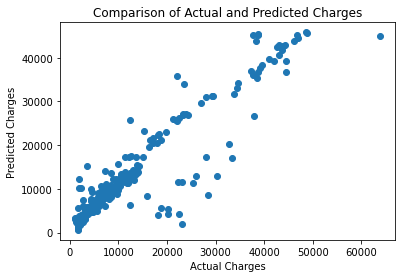

In [6]:
import matplotlib.pyplot as plt

# Make predictions using the trained heterogeneous ensemble
y_pred = voting_clf.predict(X_test)

# Create a scatter plot to compare the actual values with the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Comparison of Actual and Predicted Charges')
plt.show()
